# Generate, Transform and Explore

This notebook focuses on the pipeline for generating synthetic data (in CSV and COCO format, transforming this data to the TFRecords, and exploring them. Let's begin with creating synthetic datasets in CSV and COCO formats.

In [23]:
# Let's make sure that JNB can find our SquiDS package ;)
import sys
sys.path.insert(0, '..')

## Generate Synthetic Dataset

Generating synthetic datasets in either format will lead to the same outcome. However, it is important to understand the data structure for both formats. In the future, you may adopt the same formats for storing your real data, which significantly simplifies downstream processes as their transformation and exploration.

### Generate CSV Dataset

This is probably the most intuitive way to generate synthetic (or store real) data. Let's create our dataset.

In [24]:
from squids import create_csv_dataset
create_csv_dataset()

You can learn about different arguments of this function here. But if you leave all to default, it will create the following directories and files in the current folder.

In [25]:
!ls dataset/synthetic

categories.json  instances_test.csv   instances_val.csv
images		 instances_train.csv


| Artifact            | Type   | Comment |
|---------------------|--------|---------|
| images              | Folder | Contains all generated images |
| instances_train.csv | File   | Contains training records including image and annotations |
| instances_val.csv   | File   | Contains validation records including image and annotations |
| instances_test.csv  | File   | Contains test records including image and annotations |
| categories.json     | File   | Contains information about annotated categories |

As an example let's review the structure of the instances_train.csv file. Please note, the structure of the other two CSV files is the same.

In [26]:
import pandas as pd
df = pd.read_csv("dataset/synthetic/instances_train.csv")
df

,image_id,file_name,bboxes,segmentations,category_ids
0,0,image0.jpg,"[[4, 11, 16, 32]]","[[10, 11, 20, 43, 4, 43]]",[2]
1,1,image1.jpg,"[[44, 17, 13, 23], [3, 2, 11, 9]]","[[48, 17, 57, 40, 44, 40], [3, 2, 14, 2, 14, 1...","[2, 1]"
2,2,image2.jpg,"[[2, 46, 21, 8], [21, 6, 8, 26]]","[[2, 46, 23, 46, 23, 54, 2, 54], [29, 6, 29, 3...","[1, 2]"
3,3,image3.jpg,"[[11, 31, 17, 21], [0, 31, 18, 31]]","[[24, 31, 28, 52, 11, 52], [0, 31, 18, 31, 18,...","[2, 1]"
4,4,image4.jpg,"[[27, 21, 25, 7], [7, 32, 24, 27]]","[[38, 21, 52, 28, 27, 28], [7, 32, 31, 32, 31,...","[2, 1]"
...,...,...,...,...,...
706,991,image991.jpg,"[[21, 5, 30, 26], [3, 12, 26, 27]]","[[21, 5, 51, 5, 51, 31, 21, 31], [20, 12, 29, ...","[1, 2]"
707,993,image993.jpg,"[[37, 37, 18, 26]]","[[49, 37, 55, 63, 37, 63]]",[2]
708,994,image994.jpg,"[[5, 43, 9, 17]]","[[5, 43, 14, 43, 14, 60, 5, 60]]",[1]
709,995,image995.jpg,"[[1, 47, 27, 10]]","[[1, 47, 28, 47, 28, 57, 1, 57]]",[1]


As you can see from the printout the CSV file has 5 columns:

| Column Name   | Column Description |
|---------------|--------------------|
|image_id       | Defines an image ID which later will identifier this image in TFRecords |
|file_name      | Defines an image file name (note the file will be automatically looked up in the images directory) |
|bboxes         | Defines a list of bounding boxes, for all objects annotated in the corresponding image |
|segmentations  | Defines a list of segmentations in the form of polygons, for all objects annotated in the corresponding image |
|category_ids   | Defines a list of category IDs, for all objects annotated in the corresponding image |

You can get more information about each category ID from the `categories.json` file.

In [27]:
!cat dataset/synthetic/categories.json

{
    "categories": [
        {
            "id": 1,
            "name": "rectangle",
            "supercategory": "shape"
        },
        {
            "id": 2,
            "name": "triangle",
            "supercategory": "shape"
        }
    ]
}

For example, is a CSV file record has the following list of category IDs `[2,1]`. It means that the first annotated object is the `triangle` (since its ID is `2`), and the second is the `rectangle` (since its ID is `1` respectively).

### Generate COCO Dataset

You can generate synthetic datasets in COCO format as well. However, this functionality was introduced primarily to debug handling real COCO dataset. Nevertheless, let's repeat the same process of generating synthetic data but this time using COCO style.

In [28]:
from squids import create_coco_dataset
create_coco_dataset()

You can learn about different arguments of this function here. But if you leave all to default, it will create the following directories and files in the current folder.

In [29]:
!ls dataset/synthetic
!ls dataset/synthetic/annotations

annotations  instances_test  instances_train  instances_val
instances_test.json  instances_train.json  instances_val.json


| Artifact                         | Type   | Comment |
|----------------------------------|--------|---------|
| annotations                      | Folder | Contains files describing annotations |
| annotations/instances_train.json | File   | Contains training records including image and annotations |
| annotations/instances_val.json   | File   | Contains validation records including image and annotations |
| annotations/instances_test.json  | File   | Contains test records including image and annotations |
| instances_train                  | Folder | Contains all generated training images (annotated in instances_train.json) |
| instances_val                    | Folder | Contains all generated validation images (annotated in instances_val.json) |
| instances_test                   | Folder | Contains all generated test images (annotated in instances_test.json) |

As an example let's review the structure of the instances_train.json file. Please note, the structure of the other two JSON files is the same.

In [30]:
import json
with open("dataset/synthetic/annotations/instances_train.json") as fp:
    train = json.load(fp)
print("Top sections:", list(train.keys()))


Top sections: ['info', 'licenses', 'images', 'categories', 'annotations']


The top-level of the COCO JSON structure contains the five categories. The following three are the most important for the current topic: `images`, `annotations`, and `categories`. Let's review an image record.

In [31]:
print("images[0]:", json.dumps(train["images"][0], indent=4))

images[0]: {
    "file_name": "image1.jpg",
    "coco_url": "file:///dataset/synthetic/instances_train/image1.jpg",
    "width": 64,
    "height": 64,
    "date_captured": "2022-01-13 15:00:33",
    "id": 1
}


It contains information about an image, where the most relevant properties are `file_name` and `id`. The transformer on the following set will try to read this image file from the folder derived from the stem name of the JSON file. For example, if this file is `instances_train.json`, the image is expected to be stored in the `.../instances_train` folder. So the full path to the image will be `dataset/synthetic/annotations/instances_train/image###.jpg`

In [32]:
print("annotations[0]:", json.dumps(train["annotations"][0], indent=4))

annotations[0]: {
    "segmentation": [
        [
            51,
            52,
            53,
            58,
            41,
            58
        ]
    ],
    "area": 36.0,
    "iscrowd": 0,
    "image_id": 1,
    "bbox": [
        41,
        52,
        12,
        6
    ],
    "category_id": 2,
    "id": 2
}


The annotation record contains information about the image it belongs to via `image_id`, bounding box coordinates `bbox`, segmentation polygon coordinates `segmentation`, and `category_id` to define what type of an object is segmented. The identifier of the segmentation itself is defined by the `id` property.

In [33]:
print("categories:", json.dumps(train["categories"], indent=4))

categories: [
    {
        "supercategory": "shape",
        "id": 1,
        "name": "rectangle"
    },
    {
        "supercategory": "shape",
        "id": 2,
        "name": "triangle"
    }
]


Use category_id in the previous section to determine information about the category the annotated object belongs to.

## Transforme Dataset to TFRecords

This process is the same for the synthetic or real dataset in either CSV or COCO formats.

In [34]:
from squids import create_tfrecords
create_tfrecords()

This function also can be run with only default arguments. In this case, it will look for the default dataset directory `dataset/synthetic`. Using the directory structure the transformation method determines the data format (CSV or COCO). Then it creates a new directory `dataset/synthetic-tfrecords` where stores the transformed records.

In [35]:

!ls dataset/synthetic-tfrecords
!ls dataset/synthetic-tfrecords/instances_train
!ls dataset/synthetic-tfrecords/instances_val
!ls dataset/synthetic-tfrecords/instances_test

instances_test	instances_train  instances_val
part-0.tfrecord  part-1.tfrecord  part-2.tfrecord
part-0.tfrecord
part-0.tfrecord


AS you can see the top directory `dataset/synthetic-tfrecords` contains three subdirectories `instances_train`, `instances_val`, and `instances_test` containing file-parts with TFRecords for training, validation, and testing respectivly. Each of these folders usually includes a different number of part-files, depending on the volume of the original dataset for each machine learning task.

## Exploring TFRecords

As a part of the training process, it is important to know that the right data is entering the machine learning model. the following functions allow you to explore data located inside TFRecords.

In [36]:
from squids import explore_tfrecords
explore_tfrecords("dataset/synthetic-tfrecords/instances_train")


dataset/synthetic-tfrecords/instances_train (3 parts)
732 (2)    865 (1)    370 (2)    524 (1,2)  664 (2)    82 (1)     237 (2)  
733 (1)    866 (1,2)  371 (1)    525 (2)    665 (1,2)  83 (2)     239 (1)  
734 (2)    871 (2)    372 (1)    526 (1,2)  666 (2)    84 (2)     240 (2)  
735 (1,2)  872 (2)    373 (1,2)  527 (1)    667 (2)    85 (2)     242 (2)  
736 (2)    874 (1)    378 (1,2)  528 (1)    668 (1,2)  88 (1)     245 (2)  
737 (2)    875 (2)    379 (2)    529 (1)    671 (2)    94 (2)     246 (1,2)
738 (1,2)  876 (1,2)  381 (1)    530 (2)    673 (1)    95 (1)     247 (1)  
739 (1)    877 (2)    382 (1)    532 (1)    674 (1,2)  96 (1,2)   248 (1)  
742 (2)    878 (1)    383 (1,2)  533 (2)    675 (1)    97 (2)     250 (2)  
743 (2)    880 (2)    384 (1,2)  534 (1)    676 (2)    98 (1)     251 (2)  
744 (2)    881 (1,2)  385 (1,2)  537 (1,2)  677 (1,2)  99 (2)     252 (1)  
746 (2)    883 (1)    387 (1)    539 (2)    678 (1,2)  100 (1)    253 (2)  
747 (2)    884 (1)    388 (1,2)  

From the output, you can observe the number of TFRecords parts, the total number of images contained with these records, listing all images IDs combined with indicators categories present in each image. For example, if we have the following line `123 (1,2)`, it means that the image with ID `123` has 1 or more objects of category `1` and 1 or more objects of category `2`. This should help you pick a specific image including specific sets of categories.

Let's select an image for further exploration.

In [39]:
from squids import explore_tfrecord
exploring_image_id = 735
explore_tfrecord("dataset/synthetic-tfrecords/instances_train", exploring_image_id)

Property                  Value
------------------------  -----------
Image ID                  735
Image Shape               (64, 64, 3)
Total Labeled Objects     2
Available Categories Set  {1, 2}
Image saved to ./735.png


The output contains information about image ID it shape, number of annotated objects, and their categories. Also, all information about bounding boxes, segmentation, and categories are superimposed to the stored image, an example of which is shown below.

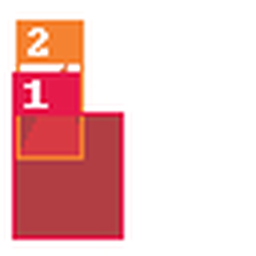

In [40]:
from PIL import Image
img = Image.open(f"./{exploring_image_id}.png")
img = img.resize((256,256), Image.ANTIALIAS)
img